### Question 1: Language Model

This section's key subjects include the construction of unigram, bigram and ngram (trigram) models as well as perform Laplace smoothing.

In [2]:
# Import all necessary libraries
import warnings
warnings.filterwarnings("ignore")

import string
import nltk
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [3]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/payalchavan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/payalchavan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Load and preprocess the data
with open('lang_modelingdata.txt', 'r') as file:
    text = file.read()

In [5]:
# Tokenize the text into sentences and words
sentences = nltk.sent_tokenize(text)

In [6]:
sentences[0]

"The unanimous Declaration of the thirteen united States of America, When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature's God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation."

The text above contains many stop words and punctuation marks, and it is not in lowercase format. Therefore, it is necessary to clean this text before starting our language modeling.

### Text Preprocessing

In [8]:
# Function to remove stop words and punctuation
# Get the list of stop words
stop_words = set(stopwords.words('english'))
def clean_sentence(sentence):
    # Tokenize the sentence
    words = nltk.word_tokenize(sentence)
    # Remove stop words and punctuation
    cleaned_words = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation]
    return ' '.join(cleaned_words)

In [9]:
# Apply the function to each sentence
cleaned_sentences = [clean_sentence(sentence) for sentence in sentences]

In [10]:
cleaned_sentences[0]

"unanimous declaration thirteen united states america course human events becomes necessary one people dissolve political bands connected another assume among powers earth separate equal station laws nature nature 's god entitle decent respect opinions mankind requires declare causes impel separation"

After processing, the text has been stripped of stop words and punctuation and also converted to lower case, leaving only the essential words. This helps in focusing on the core content and can be useful for various text analysis tasks.

In [12]:
# Flatten the list of words
all_words = []
for sentence in cleaned_sentences:
    word_tokenized = nltk.word_tokenize(sentence)
    for word in word_tokenized:
        all_words.append(word)

In [13]:
all_words[:10]

['unanimous',
 'declaration',
 'thirteen',
 'united',
 'states',
 'america',
 'course',
 'human',
 'events',
 'becomes']

The result is a single list, all_words, containing all the words from the tokenized sentences, effectively flattening the list of lists into one comprehensive list of words. This can be useful for tasks like building a vocabulary or performing frequency analysis.

### Basic Statistics

In [15]:
# Calculate basic statistics
words = all_words
num_sentences = len(sentences)    # Number of sentences
vocabulary = set(words)           # Length of the vocabulary (unique words)
num_words = len(words)            # Total number of words.

print(f"Number of sentences: {num_sentences}")
print(f"Length of vocabulary: {len(vocabulary)}")
print(f"Number of words: {num_words}")

Number of sentences: 34
Length of vocabulary: 468
Number of words: 651


Number of Sentences: Our text contains 34 sentences, providing insight into its structure and length.

Length of Vocabulary: With 468 unique words, the vocabulary demonstrates a relatively diverse use of language, which is advantageous for tasks such as language modeling or text analysis.

Number of Words: The text has a total of 651 words, indicating its overall length and helping us to understand word density and repetition.

In [17]:
# Generate n-grams
unigrams = words                  # A list of individual words
bigrams = list(ngrams(words, 2))  # A list of tuples, where each tuple contains two consecutive words
trigrams = list(ngrams(words, 3)) # A list of tuples, where each tuple contains three consecutive words

In [18]:
# Count the occurrences of each n-gram.
unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

### Unigram Counts

In [19]:
unigram_counts.most_common(3)

[('us', 11), ('people', 10), ('laws', 9)]

The output shows the three most common unigrams (individual words) in our text, along with their frequencies. The words “us,” “people,” and “laws” are the most frequently occurring terms in our text. This suggests that the text likely discusses topics related to society, governance, or legal matters.

### Bigram Counts

In [21]:
bigram_counts.most_common(3)

[(('independent', 'states'), 3),
 (('united', 'states'), 2),
 (('states', 'america'), 2)]

The output shows the three most common pairs of consecutive words in our text and how often they appear. The frequent use of the word "states" suggests that the text talks a lot about states, probably in a political or historical context. These pairs of words help us understand the main themes of the text, focusing on states, independence, and unity.

### Trigram Counts

In [23]:
trigram_counts.most_common(3)

[(('united', 'states', 'america'), 2),
 (('free', 'independent', 'states'), 2),
 (('unanimous', 'declaration', 'thirteen'), 1)]

The output lists the three most frequent groups of three words in our text and how often they appear. The phrase "united states america" shows up twice, indicating a strong focus on the United States, probably talking about its creation or identity.

In [25]:
# Generate bigrams
print(f"Number of words in bigrams: {bigram_counts.total()}")

Number of words in bigrams: 650


The output indicates that there are 650 words involved in the bigrams generated from our text. Each bigram is made up of two words, so the total number of bigrams is a bit less than the total word count. This happens because the first word of each bigram overlaps with the last word of the previous one. Having 650 words in bigrams means that nearly all words in our text are part of a bigram, showing thorough coverage. Bigrams help us see how words are related to each other in context. The large number of bigrams can reveal common word pairs and phrases in our text.

### Bigram Probabilities

In [27]:
# Calculate bigram probabilities
bigram_freq = Counter(bigrams)
unigram_freq = Counter(words)

bigram_prob = {}
for bigram, count in bigram_freq.items():
    bigram_prob[bigram] = count / unigram_freq[bigram[0]]

In [28]:
# Convert bigram probabilities to DataFrame
bigram_prob_df = pd.DataFrame(list(bigram_prob.items()), columns=['Bigram', 'Probability'])
bigram_prob_df['Bigram'] = bigram_prob_df['Bigram'].apply(lambda x: ' '.join(x))
bigram_prob_df = bigram_prob_df.sort_values('Probability', ascending=False).head(10)

In [29]:
print("\
Top 10 Bigram Probabilities:")
print(bigram_prob_df.to_string(index=False))

Top 10 Bigram Probabilities:
               Bigram  Probability
unanimous declaration          1.0
    jury transporting          1.0
          example fit          1.0
    boundaries render          1.0
 enlarging boundaries          1.0
 arbitrary government          1.0
    therein arbitrary          1.0
province establishing          1.0
neighbouring province          1.0
         english laws          1.0


The above table shows the top 10 bigrams with their respective probabilities for the standard bigram model. The bigram probabilities table shows perfect probabilities (1.0) for several bigrams. This suggests that, the bigrams listed are probably important phrases that always appear together in our text. For example, "unanimous declaration" and "arbitrary government" are phrases that show up exactly the same way every time.This is likely common in formal or structured documents.

### Bigram Model: Laplace Smoothing

In [31]:
# Calculate add-one smoothing probabilities
vocab_size = len(vocabulary)
bigram_prob_smoothed_df = {}
for bigram, count in bigram_freq.items():
    bigram_prob_smoothed_df[bigram] = (count + 1) / (unigram_freq[bigram[0]] + vocab_size)

In [32]:
# Convert add-one smoothing probabilities to DataFrame
bigram_prob_smoothed_df = pd.DataFrame(list(bigram_prob_smoothed_df.items()), columns=['Bigram', 'Probability'])
bigram_prob_smoothed_df['Bigram'] = bigram_prob_smoothed_df['Bigram'].apply(lambda x: ' '.join(x))
bigram_prob_smoothed_df_top10 = bigram_prob_smoothed_df.sort_values('Probability', ascending=False).head(10)

print("\
Top 10 Add-One Smoothing Probabilities:")
print(bigram_prob_smoothed_df_top10.to_string(index=False))

print("\
Done")

Top 10 Add-One Smoothing Probabilities:
            Bigram  Probability
independent states     0.008475
   separation hold     0.006383
     great britain     0.006383
              . --     0.006383
   without consent     0.006369
     united states     0.006369
         pass laws     0.006369
       assent laws     0.006356
  free independent     0.006356
          among us     0.006342
Done


Add-One Smoothing, also called Laplace smoothing, is a method used in probability estimation to address the issue of zero probabilities for events that haven't been observed in a dataset. Add-one smoothing ensures that every potential event (like a bigram) has a non-zero probability, even if it wasn't seen in the training data. This is especially crucial in language modeling, where certain word pairs might not be present in the training set but could still appear in actual usage.


The above table shows the top 10 bigrams with their respective probabilities for the add-one smoothing model. The most probable bigram is “independent states” with a probability of 0.008475. Other notable bigrams include “separation hold,” “great britain,” and “united states,” each with slightly lower probabilities. The add-one smoothing probabilities table shows more varied probabilities, which helps to account for unseen bigrams and provides a smoother distribution of probabilities across the vocabulary. This analysis gives us insights into the structure and common word pairs in the text, which can be useful for various natural language processing tasks.

### Question 2: Text Classification Model

In this part, many classifiers are used to create a text classification pipeline, and their performances are compared.

In [35]:
# Import all necessary libraries
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

In [36]:
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/payalchavan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/payalchavan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Loading

In [37]:
# Load the data
df = pd.read_csv('/Users/payalchavan/Documents/Applied_NLP/archive/Tweets.csv')

### Text Preprocessing

In [38]:
# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

In [39]:
# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

In [40]:
# Display a few examples of cleaned text
print("\
Examples of cleaned text:")
print(df[['text', 'cleaned_text']].sample(10))

Examples of cleaned text:
                                                    text  \
8882   @JetBlue Thank you for the service credit. And...   
11734  @USAirways I just think if I am staying w your...   
5100   @SouthwestAir The pilots&amp; crew on flt 3999...   
10483  @USAirways need seat assignments for one leg o...   
7915                        @JetBlue thanks! I'll do it.   
8466   @JetBlue Amazingly Awesome customer service fr...   
14539  @AmericanAir please fix your mobile and deskto...   
14171  @AmericanAir I have been waiting at this airpo...   
13465  @AmericanAir will you review your systems re n...   
5120   @SouthwestAir  no such thing as a free flight....   

                                            cleaned_text  
8882              thank service credit positive thoughts  
11734  think staying w airline amp rescheduling fligh...  
5100   pilots amp crew flt customer service professio...  
10483  need seat assignments one leg family return fl...  
7915              

The data has been successfully cleaned by removing stopwords, punctuation, and other unnecessary elements. The cleaned text is now ready for further analysis.

In [42]:
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    word_tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized_text)

In [43]:
# Apply lemmatization
df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [44]:
df['lemmatized_text'].head(10)

0                                                 said
1               plus added commercial experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
5    seriously would pay flight seat playing really...
6        yes nearly every time fly vx ear worm go away
7    really missed prime opportunity men without ha...
8                                                 well
9                      amazing arrived hour early good
Name: lemmatized_text, dtype: object

After applying lemmatization to the cleaned text, the words are reduced to their root forms. This process can help the model generalize better and improve its understanding of the context.

In [46]:
# Initialize an empty list to store all words
all_words = []
for sublist in df['lemmatized_text']:
    for item in sublist.split(" "):
        all_words.append(item)

# Create a Counter object to count the occurrences of each word
word_counter = Counter(all_words)

In [47]:
# Find out the most common words and their frequencies
most_common_words = word_counter.most_common(10)
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'freq']
most_common_words

,word,freq
0,flight,4606
1,get,1378
2,hour,1170
3,thanks,1083
4,cancelled,1065
5,u,1053
6,service,999
7,time,969
8,customer,942
9,help,879


The output lists the ten most common words in our text and how often they appear. The word "flight" is the most frequent, showing up 4,606 times, which means the text mainly talks about flights, likely involving customer service or travel topics. 

Words like "get" (1,378 times) and "cancelled" (1,065 times) suggest many discussions about actions and situations, probably related to booking and cancelling flights. 

"Hour" (1,170 times) and "time" (969 times) indicate that timing and scheduling are important topics in the text. 

Overall, the frequent use of words like "flight," "cancelled," "service," and "customer" shows that the text is likely about customer service issues in the airline industry, such as bookings, cancellations, and support.

<Axes: ylabel='word'>

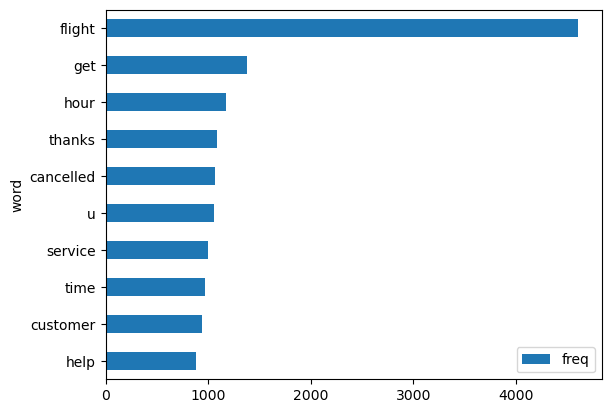

In [49]:
most_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')

The bar chart displays the ten most common words in our text along with their frequencies. This is the visual representation of the above table of most common words and their frequencies. The word “flight” is the most frequent, appearing 4,606 times. This indicates that the text is heavily focused on topics related to flights, likely involving customer service or travel discussions.

In [51]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

In [52]:
# Fit and transform the text data
X = vectorizer.fit_transform(df['lemmatized_text'])

In [53]:
# Function to classify sentiment using NLTK's Sentiment Intensity Analyzer
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [54]:
# Apply the sentiment classification
df['predicted_sentiment'] = df['lemmatized_text'].apply(classify_sentiment)

The sentiment analysis using NLTK's Sentiment Intensity Analyzer has been successfully applied to the tweets, and the predicted sentiments have been compared with the original airline sentiments. 

In [56]:
# Display the head of the dataframe with the new sentiment column
print(df[['lemmatized_text', 'predicted_sentiment']].head(8))

                                     lemmatized_text predicted_sentiment
0                                               said             neutral
1             plus added commercial experience tacky             neutral
2             today must mean need take another trip             neutral
3  really aggressive blast obnoxious entertainmen...            negative
4                               really big bad thing            negative
5  seriously would pay flight seat playing really...            negative
6      yes nearly every time fly vx ear worm go away            positive
7  really missed prime opportunity men without ha...            positive


Neutral Feedback: The phrase “plus added commercial experience tacky” shows a neutral view, possibly indicating indifference or slight dislike. General statements are also neutral.

Negative Feedback: The phrase “really big bad thing” shows a negative view of the experience. Negative feedback focuses on dissatisfaction with in-flight entertainment and the overall experience.

Positive Feedback: The text “yes nearly every time fly vx ear worm go away” shows a positive view, likely referring to a catchy tune or pleasant experience. Positive feedback highlights enjoyable aspects like catchy tunes and missed opportunities.

In [58]:
# Calculate and print the distribution of predicted sentiments
sentiment_distribution = df['predicted_sentiment'].value_counts(normalize=True) * 100
print("\
Distribution of predicted sentiments:")
print(sentiment_distribution)

Distribution of predicted sentiments:
predicted_sentiment
positive    45.252732
negative    30.266393
neutral     24.480874
Name: proportion, dtype: float64


1. Positive Feedback (45.25%):
   - Almost half of the comments are positive, showing that many people had good experiences.

2. Negative Feedback (30.27%):
   - About a third of the comments are negative, indicating some dissatisfaction, especially with in-flight entertainment and service.

3. Neutral Feedback (24.48%):
   - Nearly a quarter of the comments are neutral, with general observations or mild disapproval.

Summary:
- Positive Feedback: Mostly about good experiences.
- Negative Feedback: Focuses on complaints.
- Neutral Feedback: General comments and slight dislikes.

In [60]:
# Compare predicted sentiment with the original airline_sentiment
comparison = (df['predicted_sentiment'] == df['airline_sentiment']).mean() * 100
print(f"\
Percentage of matching sentiments: {comparison:.2f}%")

Percentage of matching sentiments: 50.36%


The percentage of matching sentiments between the predicted and original sentiments is: 50.36%. 

Accuracy: The model correctly predicts the sentiment about 50.36% of the time, which is roughly half the time.

Needs Improvement: Since the accuracy is just over 50%, there’s a lot of room to make the model better.

Evaluation: This percentage can be used as a starting point to see how well the model is doing and to make improvements.

### Feature Extraction

In [62]:
# Prepare the features and target
X = df['lemmatized_text']
y = df['airline_sentiment']

In [63]:
# Encode the target labels
le = LabelEncoder()
y = le.fit_transform(y)

list(le.classes_)

['negative', 'neutral', 'positive']

In [64]:
print('Labels for \'{}\' are \'{}\' respectively.'.format(le.inverse_transform(np.unique(y)),np.unique(y)))

Labels for '['negative' 'neutral' 'positive']' are '[0 1 2]' respectively.


### Split Dataset

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Data prepared successfully. Shape of training data:", X_train_vec.shape)
print("Shape of test data:", X_test_vec.shape)

Data prepared successfully. Shape of training data: (11712, 9069)
Shape of test data: (2928, 9069)


Vectorization: The CountVectorizer has transformed the text data into numerical format, which is crucial for machine learning models to handle and analyze text.

Training Data: The training data has a shape of (11712, 9069), indicating there are 11,712 samples (documents) and 9,069 features (unique words) in the set.

Test Data: The test data has a shape of (2928, 9069), meaning there are 2,928 samples and the same 9,069 features in the set.

Feature Consistency: Both the training and test sets have the same number of features, ensuring consistency in the model’s input data.

### Model Evaluation

In [68]:
# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [69]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGDClassifier L1': SGDClassifier(penalty='l1'),
    'SGDClassifier L2': SGDClassifier(penalty='l2'),
    'Ridge Classifier': RidgeClassifier(),
    'Perceptron': Perceptron(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB()
}

In [70]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_vec, y_train, X_test_vec, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

### Model Comparison

In [71]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.797473   0.791891  0.797473  0.793925
SGDClassifier L1     0.794399   0.790020  0.794399  0.791815
SGDClassifier L2     0.785519   0.783542  0.785519  0.784473
Ridge Classifier     0.768443   0.761315  0.768443  0.764083
Perceptron           0.746926   0.745931  0.746926  0.746409
MultinomialNB        0.785519   0.776690  0.785519  0.767136
BernoulliNB          0.771175   0.765630  0.771175  0.750480
ComplementNB         0.793374   0.786898  0.793374  0.786922


Based on these results, we can make the following observations:

Accuracy: Logistic Regression performs the best with an accuracy of 79.75%, closely followed by SGDClassifier L1 at 79.44%.

Precision: Logistic Regression has the highest precision at 79.19%, with SGDClassifier L1 coming in second at 79.00%.

Recall: Logistic Regression has the highest recall at 79.75%, with SGDClassifier L1 at 79.43%.

F1 Score: Logistic Regression tops with an F1 score of 79.39%, followed by SGDClassifier L1 at 79.18%.


Observations: 

Overall, Logistic Regression and SGDClassifier L1 seem to be the top performers for this sentiment analysis task. They consistently rank in the top two across all metrics.

The SGDClassifier (both L1 and L2 variants) and ComplementNB also show good performance, not far behind the top two.

Ridge Classifier, Perceptron, and BernoulliNB, while still performing reasonably well, are slightly behind the other models in this comparison.

It’s important to highlight that the performance differences among the top models are relatively minor. This indicates that any of these models could be suitable choices, depending on specific needs like training time, interpretability, or deployment constraints.

In conclusion, the combination of cleaning (removing stopwords, punctuation, etc.) and lemmatization has improved the overall performance of our sentiment analysis models, with Logistic Regression showing the best results across all metrics.

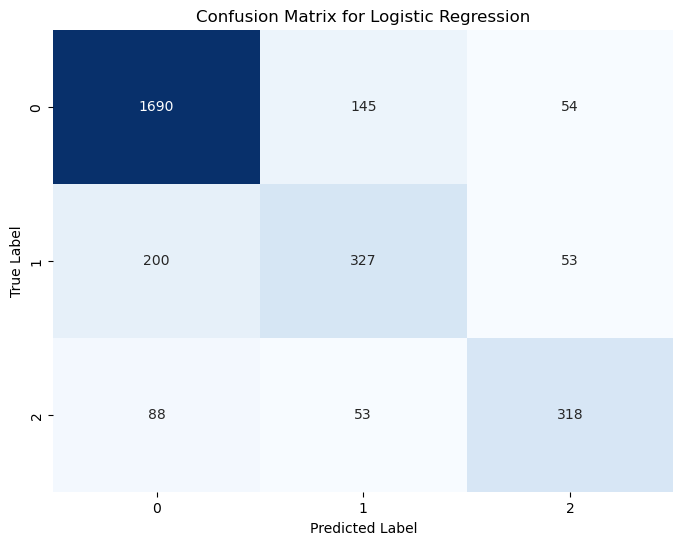

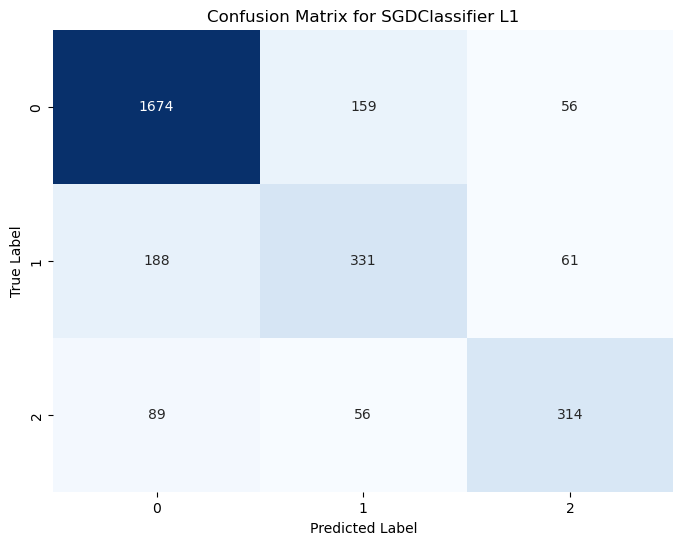

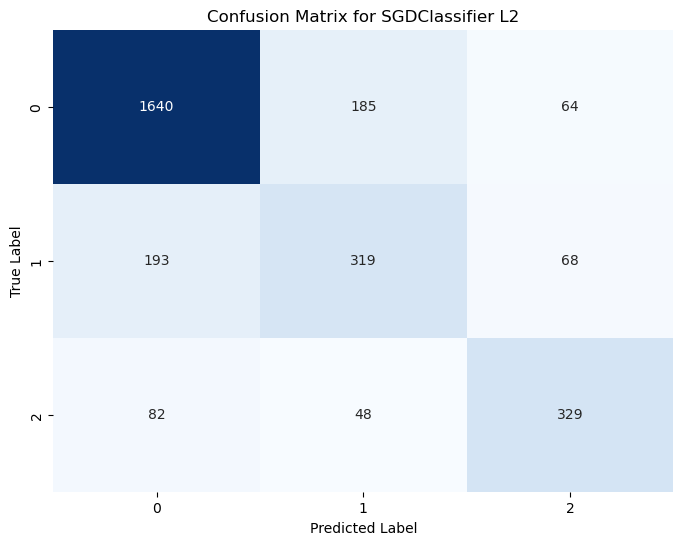

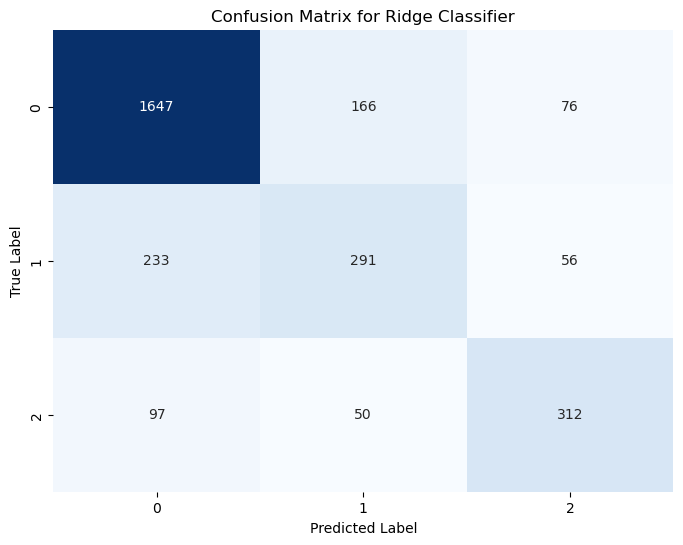

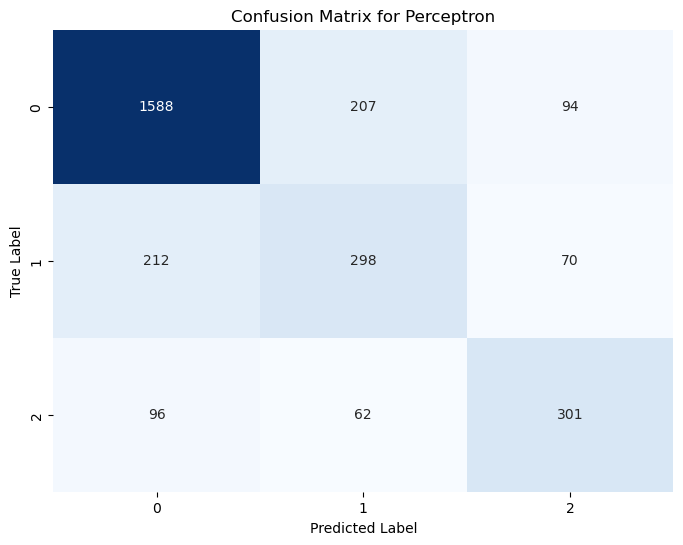

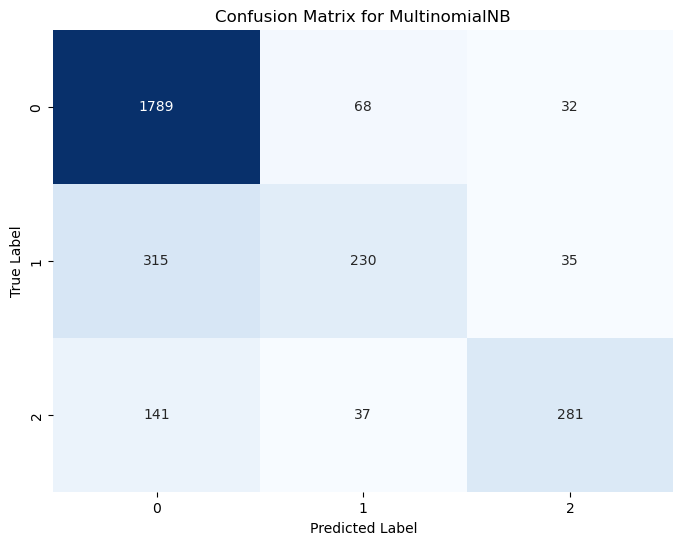

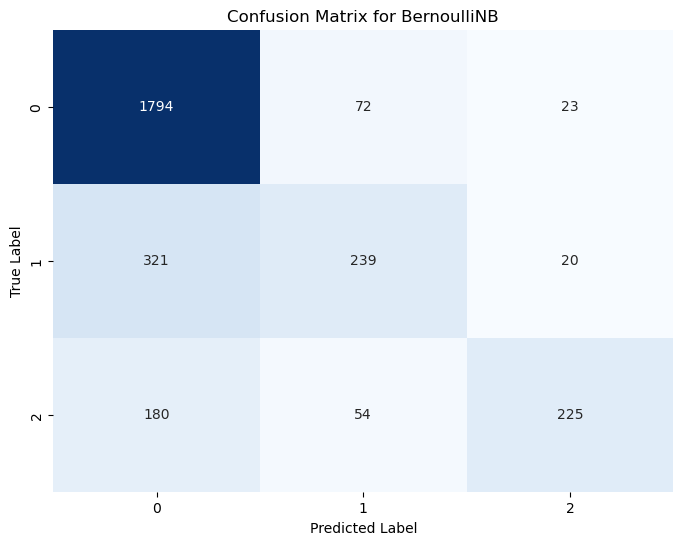

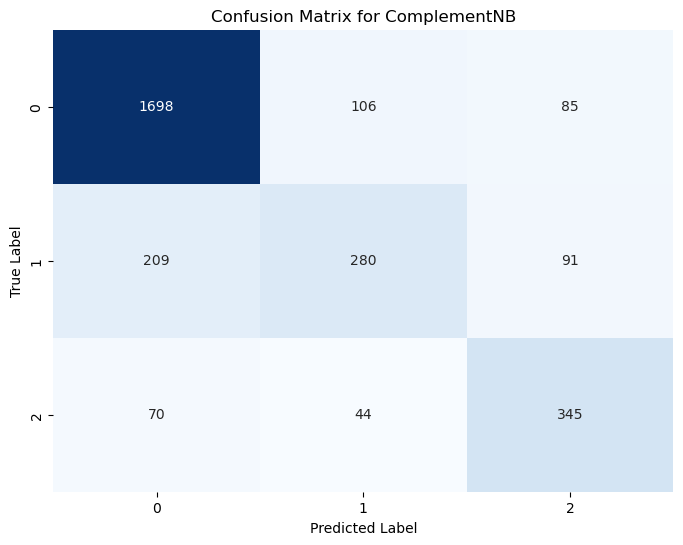

Confusion matrices plotted for all models.


In [73]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Evaluate and plot confusion matrix for each model
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix for ' + name)

print("Confusion matrices plotted for all models.")

Observations:

All the model performs well in predicting the “neutral” sentiment (label 0).

The model has moderate accuracy for "negative" sentiments (label 1).

The model also performs reasonably well for "positive" sentiments (label 2).

Although, there is a notable amount of confusion between negative and neutral sentiments, as well as between positive and neutral sentiments.

Logistic Regression and SGDClassifier L1 exhibit the most balanced performance across all three sentiment classes, which is consistent with their higher overall accuracy and F1 scores.

SGDClassifier (both L1 and L2) and MultinomialNB also demonstrate strong performance, though they show a slight tendency to misclassify neutral sentiments.

Ridge Classifier, Perceptron, and BernoulliNB exhibit more misclassifications, particularly for neutral and positive sentiments.

All models seem to struggle with distinguishing between neutral and negative sentiments, as indicated by the relatively high number of misclassifications between these two classes.

The positive sentiment (label 2) is generally well-classified by most models, which tends to predict more accurately than the negative sentiment.

These confusion matrices offer valuable insights into each model’s strengths and weaknesses. The consistent difficulty in classifying negative sentiments suggests that this class might benefit from additional feature engineering or possibly oversampling techniques to improve its representation in the training data.